# Logistic Regression for multi-class problem

In [1]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import utility
from utility import plot_confusion_matrix,plot_decision_regions

In [2]:
import pandas as pd
print(pd.__version__)
import sklearn
print(sklearn.__version__)  #conda update scikit-learn

1.5.3
1.3.0


## 載入Iris資料集


In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['data'].size)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head()

600
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)
#不篩選0,1，選擇多類別

In [5]:
y_train.shape

(105,)

In [6]:
type(y_test)

pandas.core.series.Series

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
iris_data


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto') # multi_class=multinomial
lr.fit(X_train,y_train)
print('training accuracy:',lr.score(X_train, y_train))
print('test accuracy:',lr.score(X_test, y_test))

training accuracy: 0.9619047619047619
test accuracy: 0.9555555555555556


In [10]:
X_test[:2]

,sepal length (cm),petal length (cm)
114,5.8,5.1
62,6.0,4.0


In [11]:
#prediction
pred=lr.predict(X_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [12]:
#ground truth
print(y_test.values)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [13]:
len(y_test.values)

45

In [14]:
error_index=np.where(pred!=y_test.values)[0]
error_index

array([24, 37], dtype=int64)

In [15]:
print(X_test.index[24],X_test.index[37])
#找出24與37筆資料的原始位置

126 83


In [16]:
error_index=np.where(pred!=y_test.values)[0]
print('accuracy:',1-len(error_index)/len(X_test))
print('error_index:',error_index)
print('miss classification :',pred[error_index])#錯誤答案
data_index=X_test.iloc[error_index].index 
iris_data.iloc[data_index]#錯誤欄位的正確之原始資料

accuracy: 0.9555555555555556
error_index: [24 37]
miss classification : [1 2]


,sepal length (cm),petal length (cm),target
126,6.2,4.8,2
83,6.0,5.1,1


## decision_regions for test data

In [17]:
iris_data.iloc[data_index]

,sepal length (cm),petal length (cm),target
126,6.2,4.8,2
83,6.0,5.1,1


c:\ProgramData\anaconda3\envs\ipykernel\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Courses\ML_exercise\Unit 5 - Supervised Learning\utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


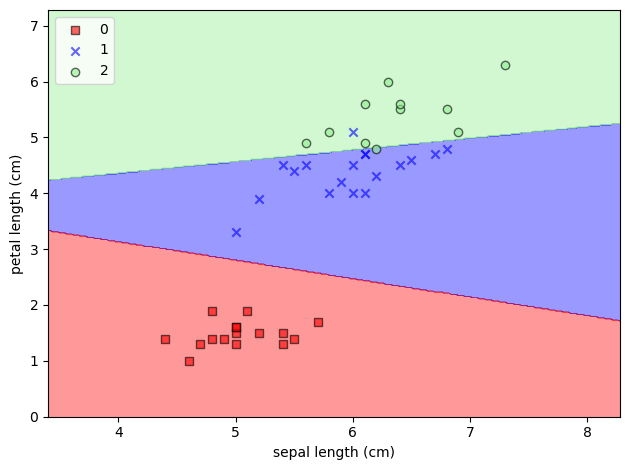

In [18]:
X_test_nd=X_test.values
plot_decision_regions(X_test_nd,y_test, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## decision_regions for training data

c:\ProgramData\anaconda3\envs\ipykernel\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Courses\ML_exercise\Unit 5 - Supervised Learning\utility.py:80: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


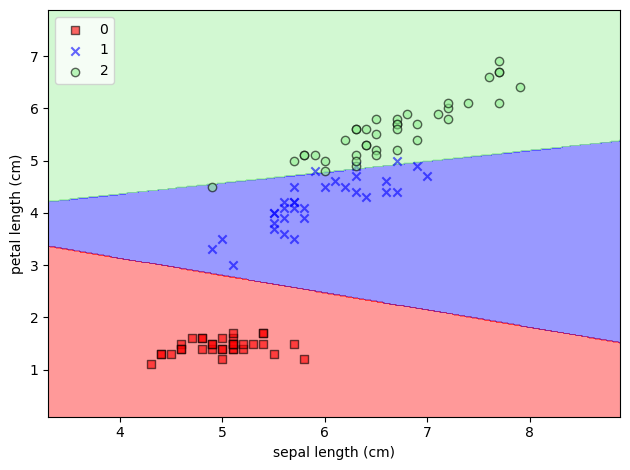

In [19]:
X_train_nd=X_train.values
plot_decision_regions(X_train_nd,y_train, classifier=lr)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
